/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


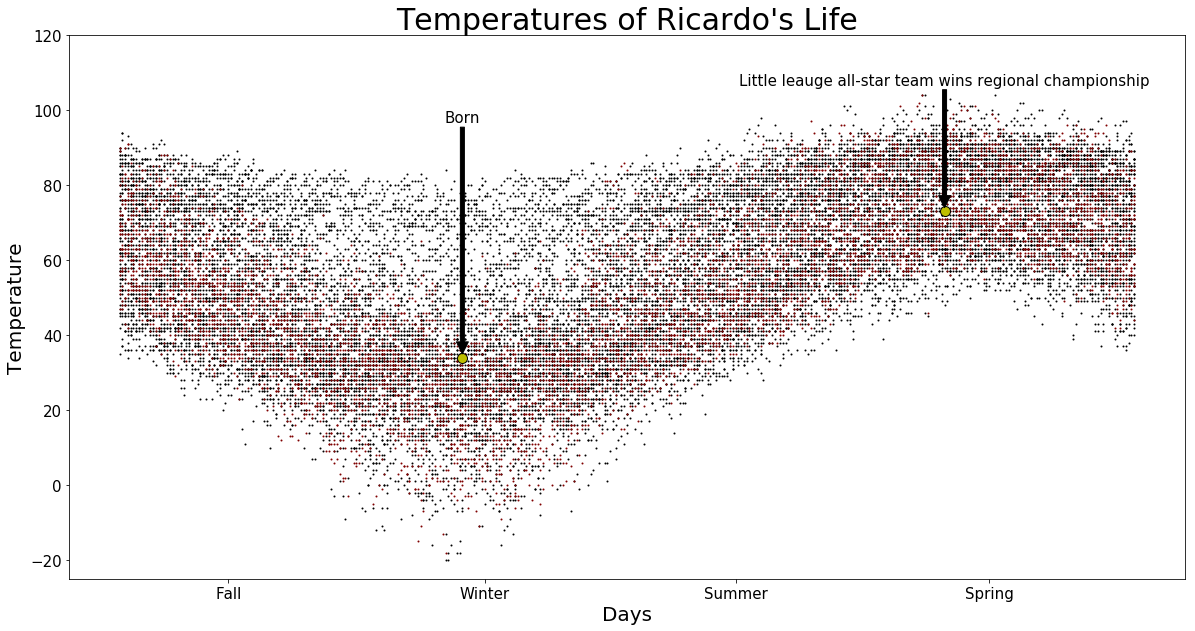

In [272]:
#The whole question is here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pylab

df1 = pd.read_csv('indianapolis.csv', delimiter =",", header = 0)
df2 = pd.read_csv('pittsburgh.csv', delimiter =",", header = 0)
df3 = pd.read_csv('miami.csv', delimiter =",", header = 0)
df4 = pd.read_csv('dc.csv', delimiter =",", header = 0)
df5 = pd.read_csv('chicago.csv', delimiter =",", header = 0)

frames = [df1, df2, df3, df4]
df = pd.concat(frames)

df = df.drop('STATION', 1)

df["DATE"] = df["DATE"].apply(lambda x: datetime.strptime(str(x),"%Y%m%d"))

#Get rid of leap year values 

leap_years = [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]

for i in leap_years:
    #print(datetime.strptime(str(i)+"0229","%Y%m%d"))
    df = df[(df["DATE"] != datetime.strptime(str(i)+"0229","%Y%m%d"))]

df["DAY"] = df['DATE'].dt.strftime('%m-%d')

df["DAY"] = df["DAY"].apply(lambda x: datetime.strptime(str(x),"%m-%d"))

df = df.set_index(df["DAY"])

df11 = df["1900-09-21":"1900-12-31"]

df12 = df["1900-01-01":"1900-09-20"] 

df12['DAY'] = df12['DAY'].apply(lambda x: x + pd.DateOffset(years=1))

df = df11.append(df12)

#Do the same for Chicago

df5 = df5.drop('STATION', 1)

df5["DATE"] = df5["DATE"].apply(lambda x: datetime.strptime(str(x),"%Y%m%d"))

#Get rid of leap year values 

leap_years = [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]

for i in leap_years:
    #print(datetime.strptime(str(i)+"0229","%Y%m%d"))
    df5 = df5[(df5["DATE"] != datetime.strptime(str(i)+"0229","%Y%m%d"))]

df5["DAY"] = df5['DATE'].dt.strftime('%m-%d')

df5["DAY"] = df5["DAY"].apply(lambda x: datetime.strptime(str(x),"%m-%d"))

df5 = df5.set_index(df5["DAY"])

df51 = df5["1900-09-21":"1900-12-31"]

df52 = df5["1900-01-01":"1900-09-20"] 

df52['DAY'] = df52['DAY'].apply(lambda x: x + pd.DateOffset(years=1))

df5 = df51.append(df52)

#Plot graphs

years = np.arange(1975, 2017, 1) 

pylab.rcParams['figure.figsize'] = (20, 10)

plt.plot(df['DAY'], df['TMAX'], 'ko', markersize = 1)
plt.plot(df['DAY'], df['TMIN'], 'ko', markersize = 1)
#Plot Chicago
plt.plot(df5['DAY'], df5['TMAX'], 'o', markersize = 1, color  = '#800000')
plt.plot(df5['DAY'], df5['TMIN'], 'o', markersize = 1, color = '#800000')
plt.plot(datetime(1901, 1, 22), 34, 'o', color ='y',fillstyle='full', markersize = 10, markeredgecolor='k', markeredgewidth=1.0)
plt.plot(datetime(1901, 7, 14), 73 , 'o', color ='y',fillstyle='full', markersize = 10, markeredgecolor='k', markeredgewidth=1.0)


plt.ylim(-25,120)
labels = ['Fall','Winter','Summer','Spring']
positions = [datetime(1900, 10, 30),datetime(1901, 1, 30),datetime(1901, 4, 30),datetime(1901, 7, 30)]
plt.xticks(positions, labels, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Days", fontsize = 20)
plt.ylabel("Temperature", fontsize = 20)
plt.title("Temperatures of Ricardo's Life", fontsize = 30)

plt.annotate('Born', xy=(datetime(1901, 1, 22), 35 ),
        xytext=(datetime(1901, 1, 22), 100),
        arrowprops=dict(facecolor='black'),
        horizontalalignment='center', verticalalignment='top', fontsize='15')

plt.annotate('Little leauge all-star team wins regional championship', xy=(datetime(1901, 7, 14), 74 ),
        xytext=(datetime(1901, 7, 14), 110),
        arrowprops=dict(facecolor='black'),
        horizontalalignment='center', verticalalignment='top', fontsize='15')

plt.show()